<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-Assignments/blob/main/Assignment_11_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment-11 : Recommendation System**
( To implement a recommendation system using cosine similarity on an anime dataset. )

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [ ]:
df = pd.read_csv("/content/anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


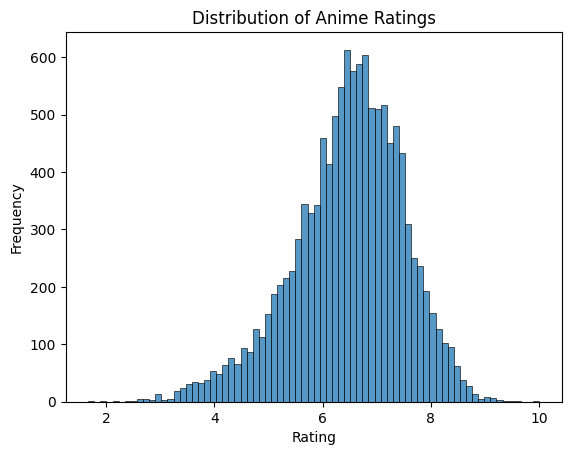

In [ ]:
#histogram of the 'rating' column to understand the distribution of anime ratings
sns.histplot(df['rating'])
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

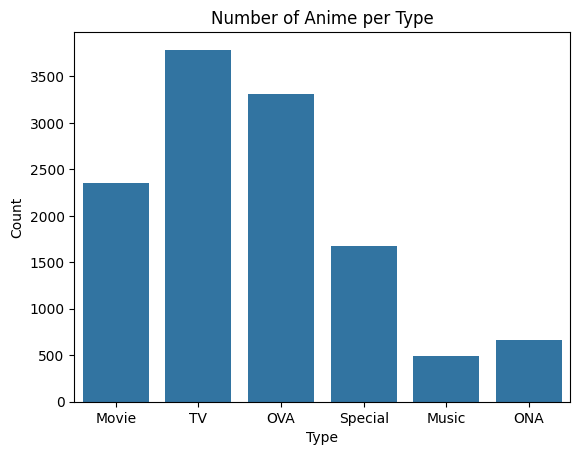

In [ ]:
#countplot
sns.countplot(x='type', data=df)
plt.title('Number of Anime per Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

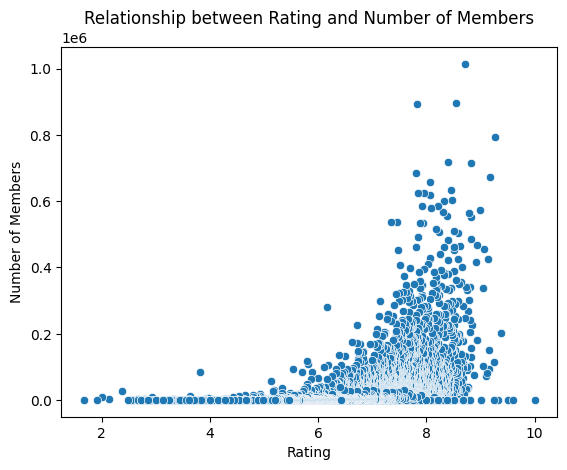

In [ ]:
#scatter plot to explore the relationship between 'rating' and 'members'
sns.scatterplot(x='rating', y='members', data=df)
plt.title('Relationship between Rating and Number of Members')
plt.xlabel('Rating')
plt.ylabel('Number of Members')
plt.show()

# Data Preprocessing

In [ ]:
df['genre'].value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


In [ ]:
df.sort_values('anime_id')

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848
...,...,...,...,...,...,...,...
2726,34514,Pokemon Generations,"Action, Adventure, Fantasy, Game, Kids",ONA,18,7.21,295
9586,34519,Mobile Suit Gakuen: G-Reco Koushien,Comedy,Special,9,5.67,94
11104,34522,"Wake Up, Girls! Shin Shou","Drama, Music",TV,Unknown,NaN,381
10952,34525,Centaur no Nayami,"Comedy, Fantasy, Slice of Life, Supernatural",TV,Unknown,NaN,108


In [ ]:
df.shape

(12294, 7)

In [ ]:
#no. of unique users in the dataset
len(df.anime_id.unique())

12294

In [ ]:
df['rating'].value_counts()

,count
rating,
6.00,141
7.00,99
6.50,90
6.25,84
5.00,76
...,...
3.47,1
3.71,1
3.87,1


In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
df.describe()

,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.352786,1.807134e+04
std,11455.294701,1.343119,5.482068e+04
min,1.000000,0.000000,5.000000e+00
25%,3484.250000,5.820000,2.250000e+02
50%,10260.500000,6.550000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


# Feature Extraction

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert the 'genre' column to string type and replace NaN values with empty string before splitting.
df['genre'] = df['genre'].astype(str).fillna('').str.split(',')

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
df = pd.concat([df, genre_df], axis=1)

In [ ]:
#Normalizing numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['rating', 'members']] = scaler.fit_transform(df[['rating', 'members']])

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,Adventure,Cars,Comedy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,0.937,0.197872,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,0.926,0.782770,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,0.925,0.112689,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,0.917,0.664325,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samur...",TV,51,0.916,0.149186,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Recommendation system

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(target_anime_name, df, threshold=0.8):

  # Replace 'Unknown' values with NaN
  df = df.replace('Unknown', float('nan'))

  # Dropping rows with NaN values in relevant columns
  features_start_index = 4
  df = df.dropna(subset=df.columns[features_start_index:])

  # Finding the index of the target anime
  target_index = df[df['name'] == target_anime_name].index[0]

  # Get the feature vector for the target anime
  target_features = df.iloc[target_index, features_start_index:].values

  # Calculating cosine similarity with all other anime
  similarity_scores = cosine_similarity([target_features], df.iloc[:, features_start_index:].values)[0]

  # Creating a list of recommendations
  recommendations = []
  for i, score in enumerate(similarity_scores):
    if i != target_index and score >= threshold:  # Exclude the target anime itself
      recommendations.append(df.iloc[i]['name'])

  return recommendations

  # Check if the target anime exists in the DataFrame
  if target_anime_name not in df['name'].values:
    return []  # Return an empty list if not found

  # Finding the index of the target anime
  target_index = df[df['name'] == target_anime_name].index[0]

In [ ]:
recommendations = recommend_anime('Cowboy Bebop', df, threshold=0.7)
recommendations

['Fullmetal Alchemist: Brotherhood',
 'Gintama°',
 'Steins;Gate',
 'Gintama&#039;',
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter (2011)',
 'Ginga Eiyuu Densetsu',
 'Gintama&#039;: Enchousen',
 'Clannad: After Story',
 'Gintama',
 'Code Geass: Hangyaku no Lelouch R2',
 'Haikyuu!! Second Season',
 'Shigatsu wa Kimi no Uso',
 'Mushishi Zoku Shou 2nd Season',
 'Code Geass: Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'One Punch Man',
 'Monogatari Series: Second Season',
 'Mushishi Zoku Shou',
 'Mushishi',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Natsume Yuujinchou Go',
 'Hajime no Ippo: New Challenger',
 'Natsume Yuujinchou Shi',
 'Fate/Zero 2nd Season',
 'Monster',
 'Bakuman. 3rd Season',
 'Death Note',
 'Gintama°: Aizome Kaori-hen',
 'Ansatsu Kyoushitsu (TV) 2nd Season',
 'Haikyuu!!',
 'Hajime no Ippo: Rising',
 'Natsume Yuujinchou San',
 'Ping Pong The Animation',
 'Boku dake ga I

In [ ]:
recommendations = recommend_anime('Death Note', df, threshold=0.8)
recommendations

['Fullmetal Alchemist: Brotherhood',
 'Gintama°',
 'Steins;Gate',
 'Gintama&#039;',
 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
 'Hunter x Hunter (2011)',
 'Ginga Eiyuu Densetsu',
 'Gintama&#039;: Enchousen',
 'Clannad: After Story',
 'Gintama',
 'Code Geass: Hangyaku no Lelouch R2',
 'Haikyuu!! Second Season',
 'Shigatsu wa Kimi no Uso',
 'Mushishi Zoku Shou 2nd Season',
 'Code Geass: Hangyaku no Lelouch',
 'Hajime no Ippo',
 'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
 'Cowboy Bebop',
 'One Punch Man',
 'Monogatari Series: Second Season',
 'Mushishi Zoku Shou',
 'Mushishi',
 'Tengen Toppa Gurren Lagann',
 'Great Teacher Onizuka',
 'Natsume Yuujinchou Go',
 'Hajime no Ippo: New Challenger',
 'Natsume Yuujinchou Shi',
 'Fate/Zero 2nd Season',
 'Monster',
 'Bakuman. 3rd Season',
 'Ansatsu Kyoushitsu (TV) 2nd Season',
 'Haikyuu!!',
 'Hajime no Ippo: Rising',
 'Natsume Yuujinchou San',
 'Ping Pong The Animation',
 'Boku dake ga Inai Machi',
 'Yojouhan Shinwa

In [ ]:
target_anime = "Some Non-Existent Anime"

if target_anime in df['name'].values:
  recommendations = recommend_anime(target_anime, df, threshold=0.7)
  print(recommendations)
else:
  print(f"Anime '{target_anime}' not found in the dataset.")

Anime 'Some Non-Existent Anime' not found in the dataset.


# Interview Questions

###1.Difference between user-based and item-based collaborative filtering

- User-based collaborative filtering focuses on finding users with similar tastes to the target user and recommends items liked by those similar users. It computes the similarity between users. It is less scalable as the number of users grows and suffers from the cold start problem for new users.

- Item-based collaborative filtering focuses on finding items similar to those the target user has liked and recommends those similar items. It computes the similarity between items. It is more scalable as item similarity can be pre-computed and is less affected by the cold start problem for new users.

In essence, user-based looks for similar users, while item-based looks for similar items to make recommendations.

###2. What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation system technique that predicts a user's preferences based on the preferences of other users.

How it works:

Data Collection: Gather user ratings or interactions with items (e.g., movies, products).
Similarity Calculation: Calculate the similarity between users (user-based) or items (item-based) using metrics like cosine similarity or Pearson correlation.
Prediction: For user-based, predict the target user's rating for an item based on the ratings of similar users. For item-based, predict the rating based on the user's ratings of similar items.
Recommendation: Recommend items with the highest predicted ratings.

Example:

If user A and user B have rated similar movies highly in the past, and user B has rated a new movie highly, the system might recommend that new movie to user A.